1. Gerekli kütüphaneler

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

2. Veriyi okuma

In [2]:
# Verileri oku
train_df = pd.read_csv("../datasets/pca/train_mental_pca.csv")
test_df = pd.read_csv("../datasets/pca/test_mental_pca.csv")

# Özellik ve hedef ayır
X_train = train_df.drop("treatment", axis=1)
y_train = train_df["treatment"]

X_test = test_df.drop("treatment", axis=1)
y_test = test_df["treatment"]

# Kategorik hedefi one-hot formatına çevir
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

3. ANN modeli

In [3]:
# ANN mimarisi
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # 2 sınıf için softmax
])

# Derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-04-22 23:39:28.968240: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-22 23:39:28.968265: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-22 23:39:28.968268: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-22 23:39:28.968303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 23:39:28.968312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

4. Model eğitimi

In [4]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30


2025-04-22 23:39:29.323200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5082 - loss: 0.9232 - val_accuracy: 0.6200 - val_loss: 0.6513
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6400 - loss: 0.7276 - val_accuracy: 0.6550 - val_loss: 0.6120
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6581 - loss: 0.6811 - val_accuracy: 0.6850 - val_loss: 0.6193
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6141 - loss: 0.6972 - val_accuracy: 0.7000 - val_loss: 0.6055
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6518 - loss: 0.6998 - val_accuracy: 0.6950 - val_loss: 0.6006
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6655 - loss: 0.6672 - val_accuracy: 0.7000 - val_loss: 0.6047
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6771 - loss: 0.6317 - val_accuracy: 0.6850 - val_loss: 0.5994
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6493 - loss: 0.6536 - val_accuracy: 0.6900 - val_loss: 0.

5. Tahmin, rapor ve görselleştirme

In [5]:
# Tahmin (olasılıklar)
y_pred_proba = model.predict(X_test)

# En yüksek olasılığa göre sınıf tahmini
y_pred = y_pred_proba.argmax(axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


📋 Sınıflandırma Raporu (ANN):

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       124
           1       0.69      0.66      0.67       125

    accuracy                           0.68       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.68      0.68      0.68       249



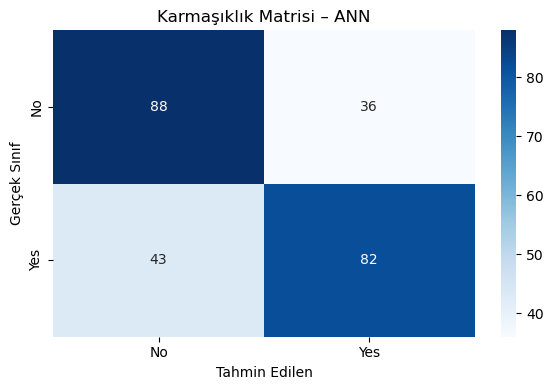

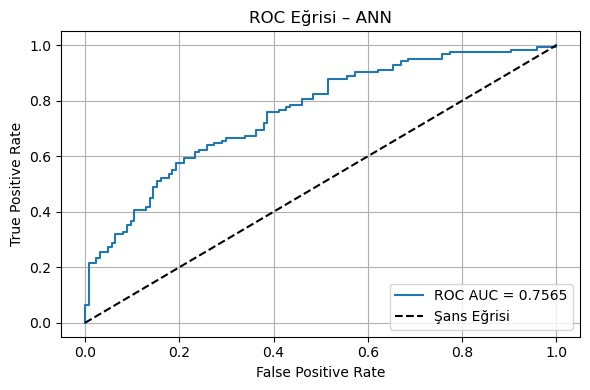

In [6]:
# Rapor
print("📋 Sınıflandırma Raporu (ANN):\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – ANN")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# Sadece pozitif sınıfın (1) olasılığı alınır
y_score = y_pred_proba[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Çizim
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'k--', label="Şans Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – ANN")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()